In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dnase_metrics = pd.read_csv('/oak/stanford/groups/akundaje/kmualim/ABC-Enhancer-Gene-Prediction/sherlock_scripts/helper_scripts/DNase_only_concat.tsv', sep="\t")

### filter metadata for biosamples that pass QC

In [165]:
import math 
x=np.float('nan')
concat3['Biosample_ID_new'] = concat3['Biosample_id']
i=0
for index, row in concat3.iterrows():
    try:
        math.isnan(row['Biosample treatments'])
        continue
        i+=1
    except:
        biosample_name = row['Biosample_id']
        if type(row['Biosample treatments amount'])==np.float and type(row['Biosample treatments duration'])==np.float:
            treatment = row['Biosample treatments'].replace(" ", "_")
        elif type(row['Biosample treatments duration'])==np.float:
            treatment = row['Biosample treatments'].replace(" ", "_")+"_"+row['Biosample treatments amount'].replace(" ", "_")
        elif type(row['Biosample treatments amount'])==np.float:
            treatment = row['Biosample treatments'].replace(" ", "_")+"_"+row['Biosample treatments duration'].replace(" ", "_")
        else:
            treatment = row['Biosample treatments'].replace(" ", "_")+"_"+row['Biosample treatments amount'].replace(" ", "_")+"_"+row['Biosample treatments duration'].replace(" ", "_")
        treatments = treatment.replace(",", "").replace("/", "")
        concat3.iloc[i, -1] = biosample_name+"_"+treatments
        print(concat3.iloc[i, -1])
        i+=1

A549_ENCDO000AAZ_ENCFF008YUA_dexamethasone_100_nM_1_hour
hematopoietic_multipotent_progenitor_cell_ENCDO937OUY_ENCFF406WNO_kit_ligand_hydrocortisone_succinate_interleukin-3_erythropoietin_8_day
MCF_10A_ENCFF101JIC_tamoxifen_1.0_μM_6.0_hour
cardiac_muscle_cell_ENCFF798CBX_ENCFF062FBQ_Bone_morphogenetic_protein_4_Fibroblast_growth_factor_2_Activin_A_5_ngmL_6_ngmL_10_ngmL_14_day
SK-N-SH_ENCFF481OBU_ENCFF772OQK_all-trans-retinoic_acid_6_μM_48_hour
MCF_10A_ENCFF766UHF_tamoxifen_1.0_μM_24.0_hour
WI38_ENCFF106KYR_ENCFF760MER_afimoxifene_20.0_nM_72.0_hour
SK-N-DZ_ENCFF859JWM_ENCFF137RKG_dimethyl_sulfoxide_72_hour
hematopoietic_multipotent_progenitor_cell_ENCFF551DAJ_ENCFF831YIL_kit_ligand_hydrocortisone_succinate_interleukin-3_erythropoietin_15_day
bronchial_epithelial_cell_ENCFF357JVE_ENCFF267VKU_retinoic_acid_6_μM_48_hour
CD4-positive__alpha-beta_T_cell_ENCFF397NGT_G-CSF_7.5_μgkg_4_day
CD8-positive__alpha-beta_T_cell_ENCFF373EQD_G-CSF_7.5_μgkg_4_day
cardiac_myoblast_ENCFF426WHF_Bone_morphoge

activated_CD4-positive__alpha-beta_T_cell_ENCFF875DPQ_anti-CD3_and_anti-CD28_coated_beads_Interleukin-2_50_UmL_48_hour
stimulated_activated_CD4-positive__alpha-beta_T_cell_ENCFF563PQP_Interleukin-12_subunit_alpha_Interleukin-12_subunit_beta_anti-CD3_and_anti-CD28_coated_beads_100_ngmL_48_hour
activated_CD4-positive__alpha-beta_T_cell_ENCFF344GNL_anti-CD3_and_anti-CD28_coated_beads_48_hour
stimulated_activated_CD4-positive__alpha-beta_T_cell_ENCFF817ZNY_Interleukin-12_subunit_alpha_Interleukin-12_subunit_beta_anti-CD3_and_anti-CD28_coated_beads_100_ngmL_4_hour
stimulated_activated_CD4-positive__alpha-beta_T_cell_ENCFF073HQE_anti-CD3_and_anti-CD28_coated_beads_Interleukin-2_100_ngmL_48_hour
stimulated_activated_CD4-positive__alpha-beta_T_cell_ENCFF252KIH_anti-CD3_and_anti-CD28_coated_beads_TNF-alpha_100_ngmL_1_hour
inflammatory_macrophage_ENCFF734GJO_lipopolysaccharide_4_hour
activated_CD4-positive__alpha-beta_T_cell_ENCFF301HWJ_anti-CD3_and_anti-CD28_coated_beads_24_hour
activated_CD4-p

In [168]:
concat3.to_csv("/oak/stanford/groups/akundaje/kmualim/out/finalized_metadata/DNase-only.default_metadata.101322.qc.tsv", sep="\t", index=False)

### plot metrics

/software/miniconda3/envs/final-abc-env/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/software/miniconda3/envs/final-abc-env/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


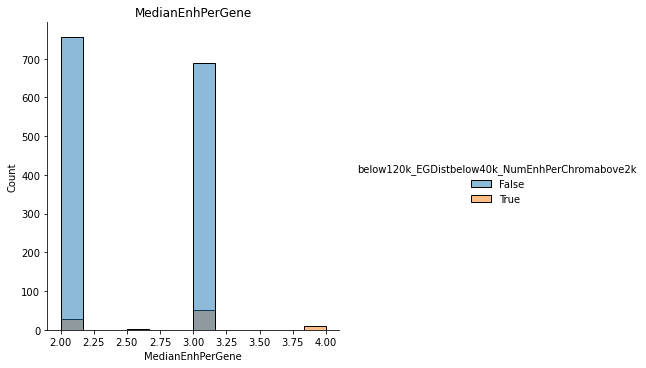

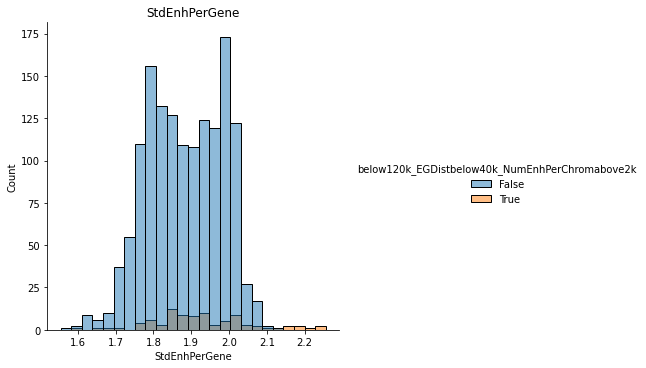

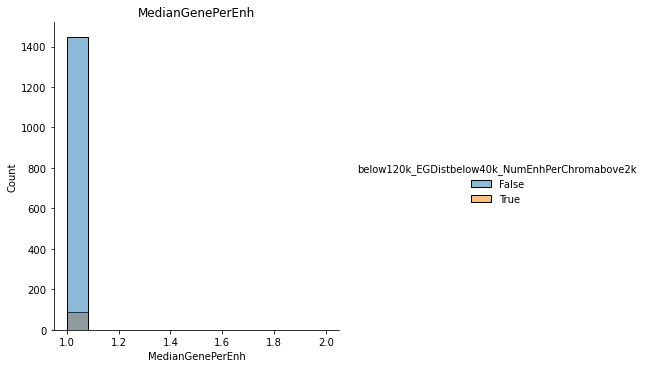

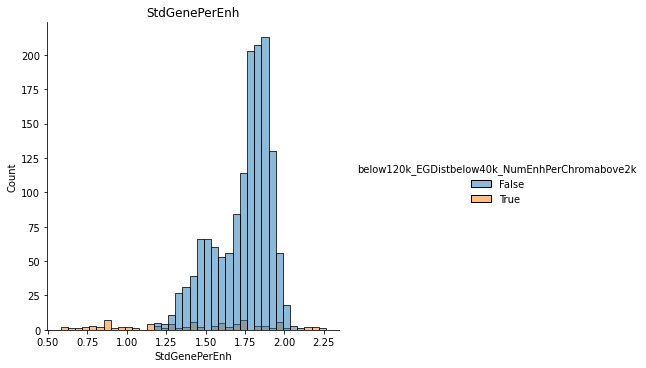

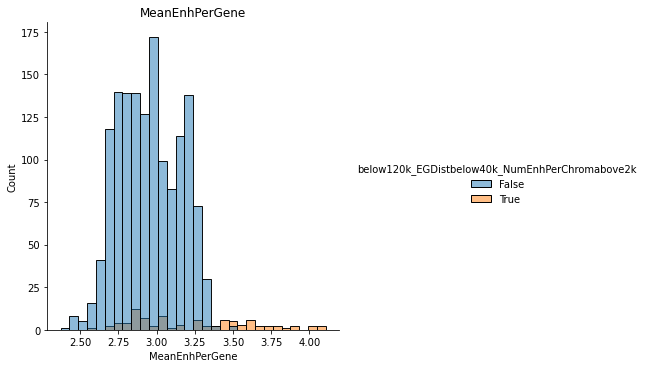

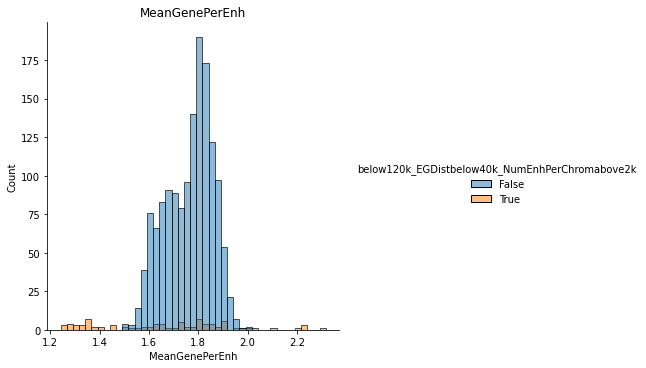

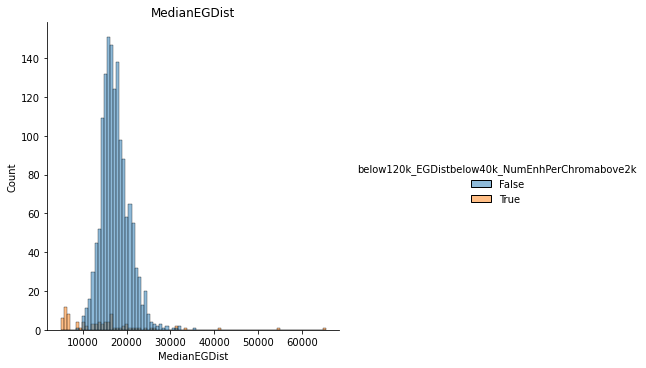

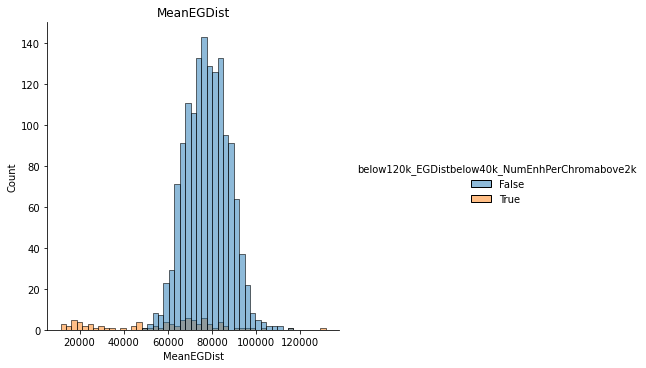

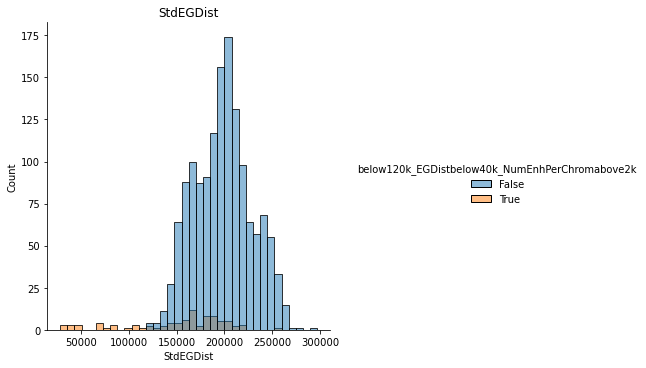

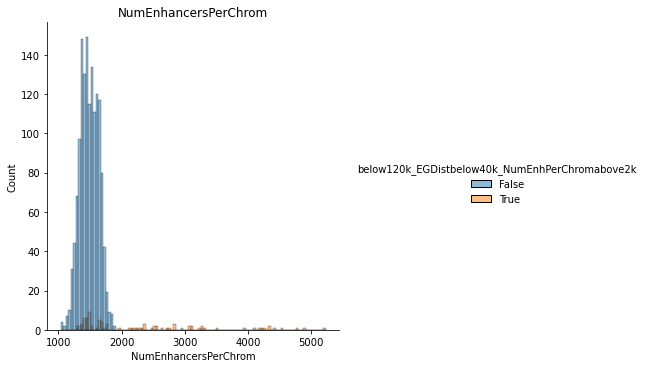

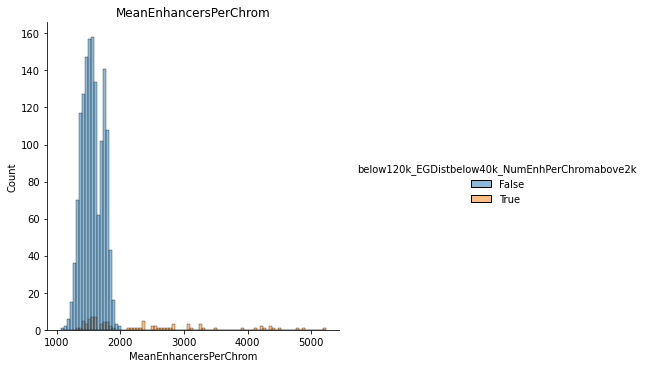

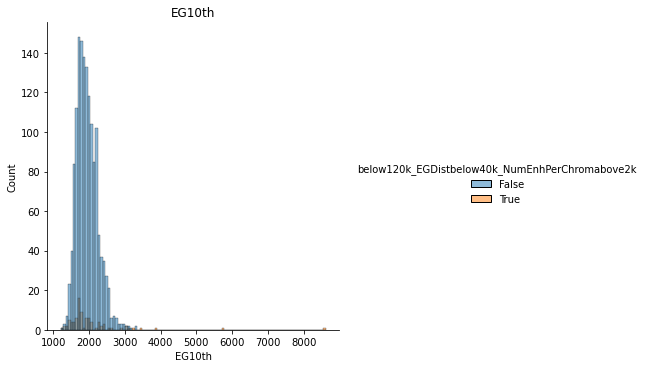

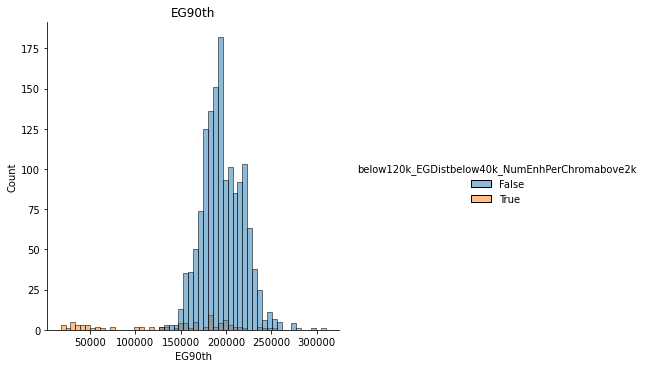

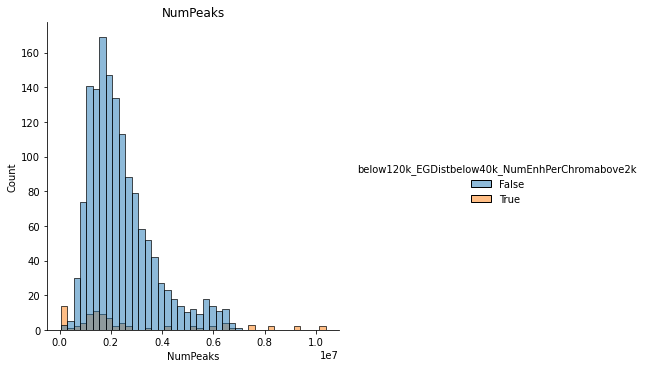

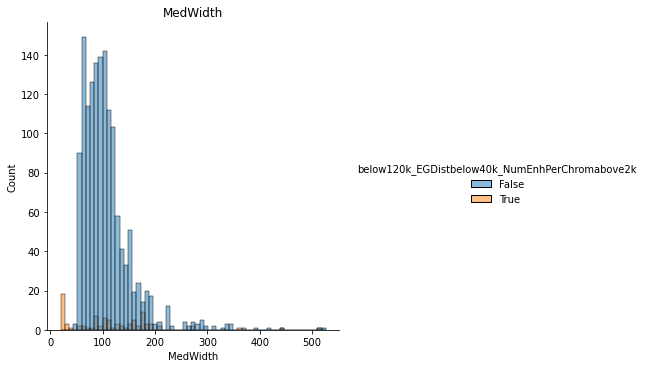

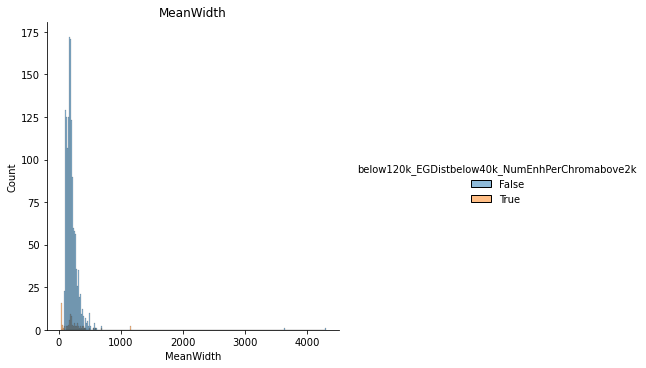

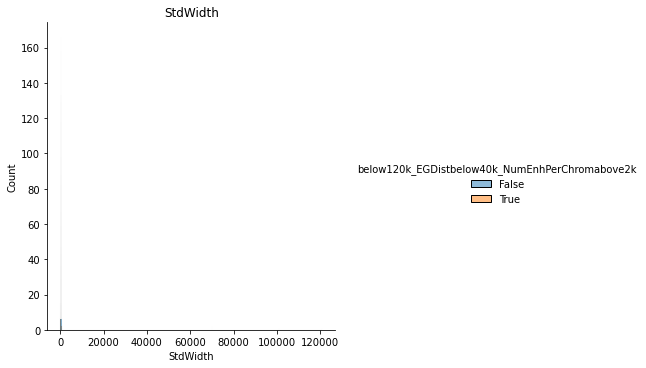

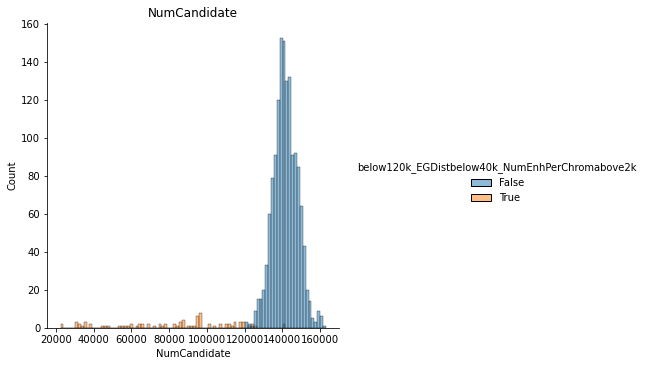

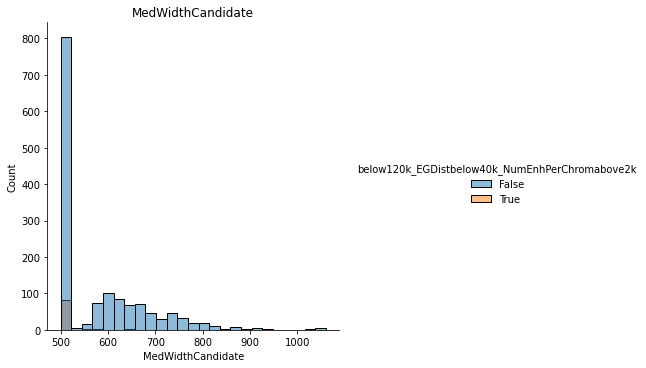

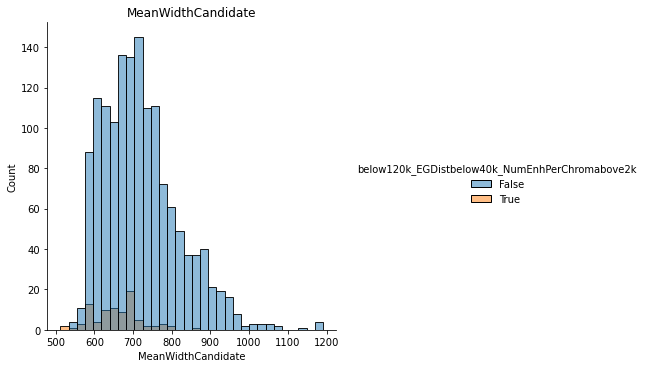

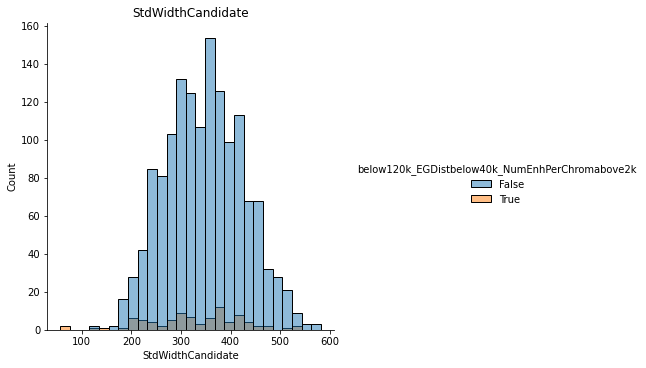

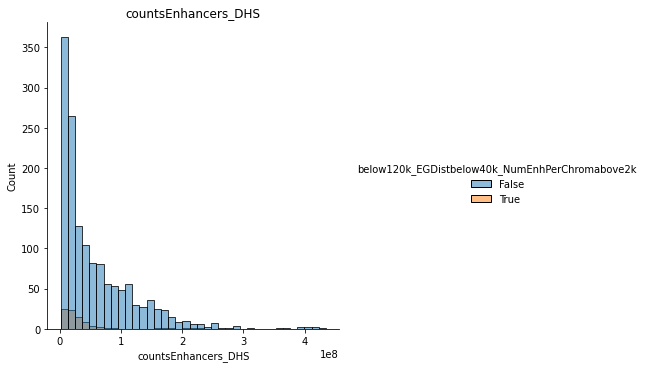

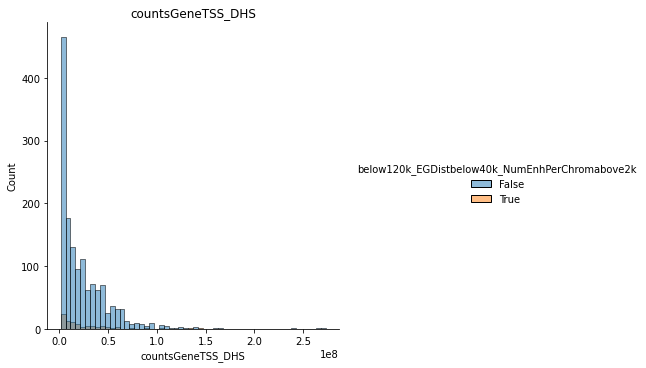

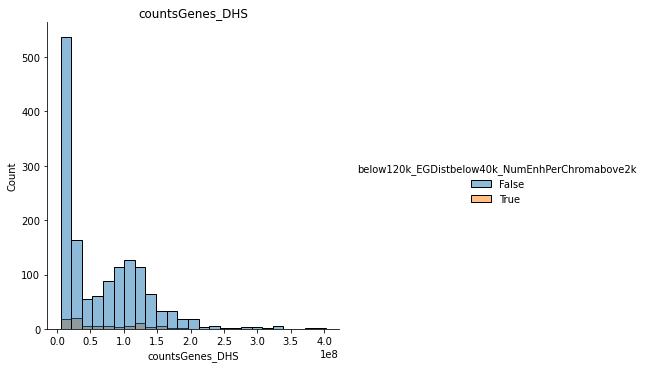

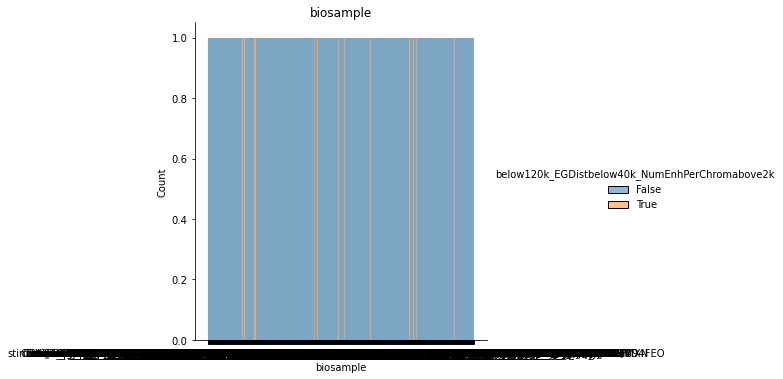

In [25]:
for col in dnase_metrics.columns[:-2]:
    sns.displot(data=dnase_metrics, x=col, hue="below120k_EGDistbelow40k_NumEnhPerChromabove2k").set(title=str(col))
    

In [40]:
dnase_h3k27ac_metrics = pd.read_csv('/oak/stanford/groups/akundaje/kmualim/ABC-Enhancer-Gene-Prediction/sherlock_scripts/helper_scripts/DNase_H3k27ac_concat.tsv', sep="\t")
dnase_h3k27ac_metrics.head()

dnase_h3k27ac_metrics['below120k_EGDistbelow40k_NumEnhPerChromabove2k'] = 'False'
dnase_h3k27ac_metrics.loc[((dnase_h3k27ac_metrics['NumCandidate']<120000) | (dnase_h3k27ac_metrics['MeanEGDist']<40000) | (dnase_h3k27ac_metrics['NumEnhancersPerChrom']>2000)), 'below120k_EGDistbelow40k_NumEnhPerChromabove2k'] = 'True'

dnase_h3k27ac_metadata = pd.read_csv("/oak/stanford/groups/akundaje/kmualim/out/finalized_metadata/DNase_H3K27ac.default_metadata_full.092822.tsv", sep="\t")
subset_h3k27ac_metadata = dnase_h3k27ac_metadata.loc[dnase_h3k27ac_metadata['Biosample'].isin(list(dnase_h3k27ac_metrics['biosample']))]



In [42]:
subset_h3k27ac_metadata.to_csv("/oak/stanford/groups/akundaje/kmualim/out/finalized_metadata/DNase_H3K27ac.default_metadata_full.101222.qc.tsv", sep="\t", index=False)

/software/miniconda3/envs/final-abc-env/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


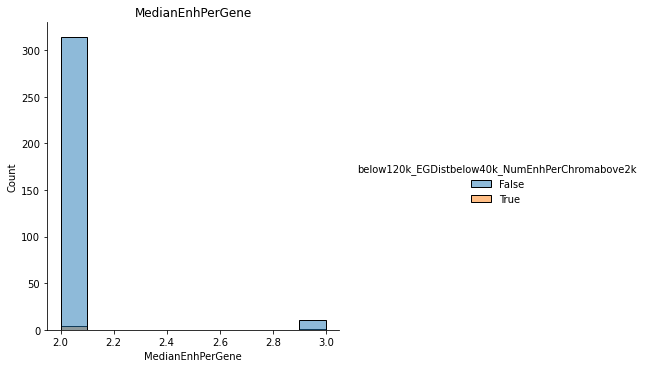

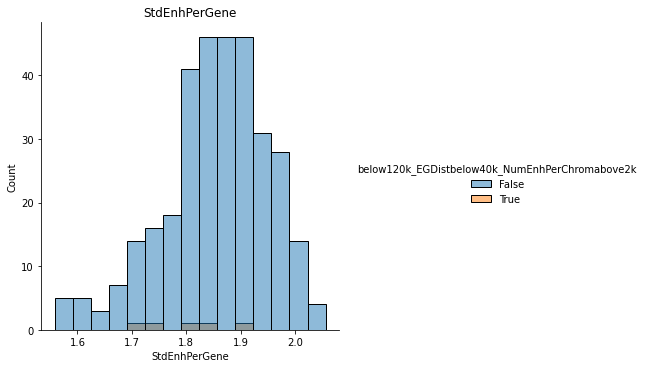

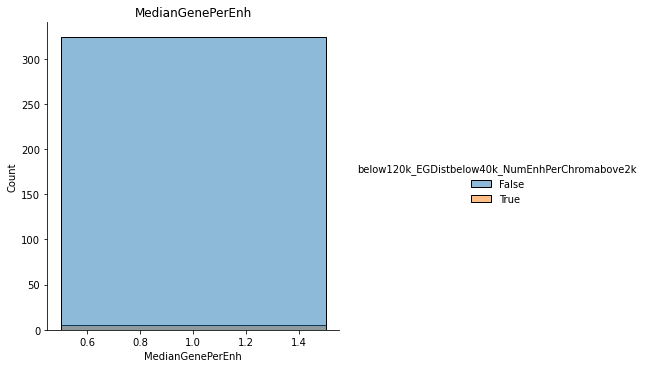

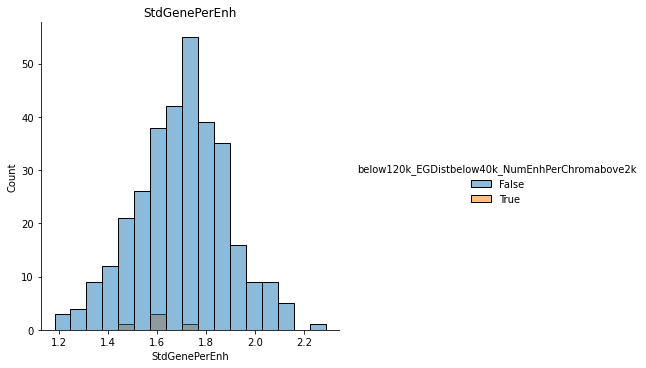

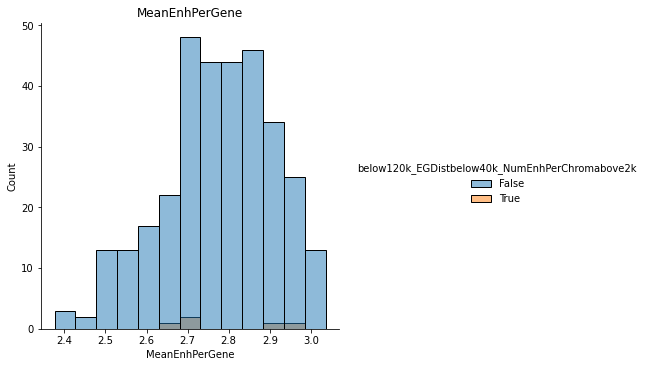

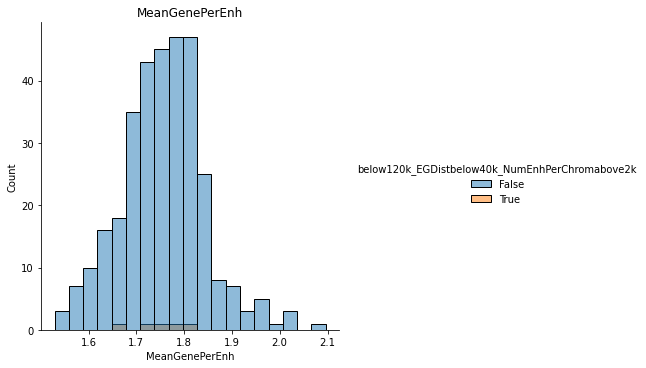

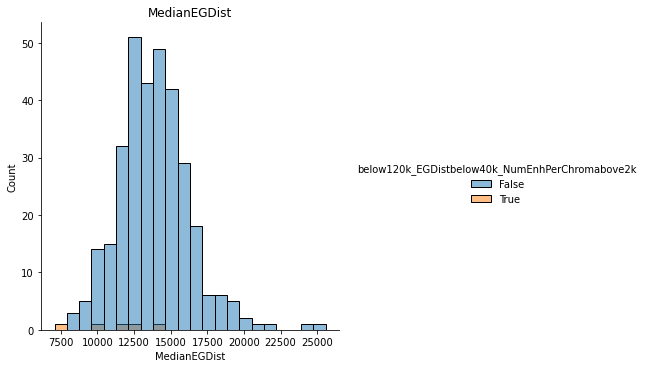

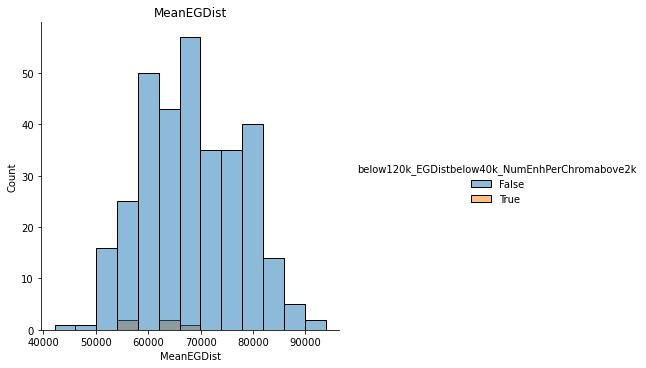

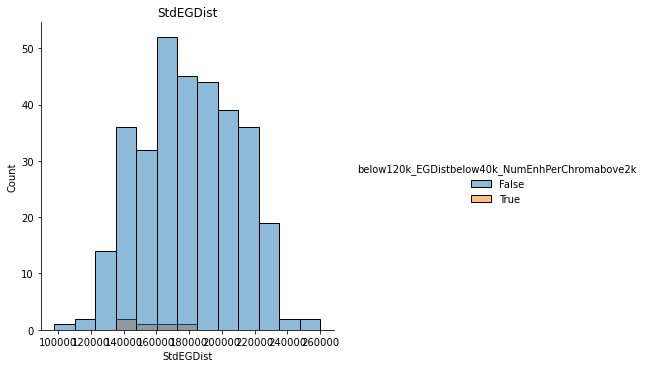

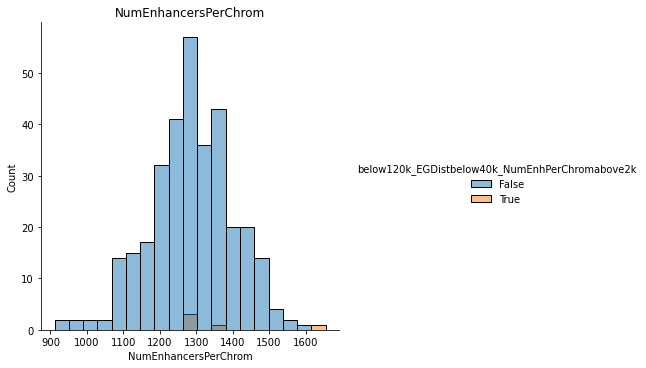

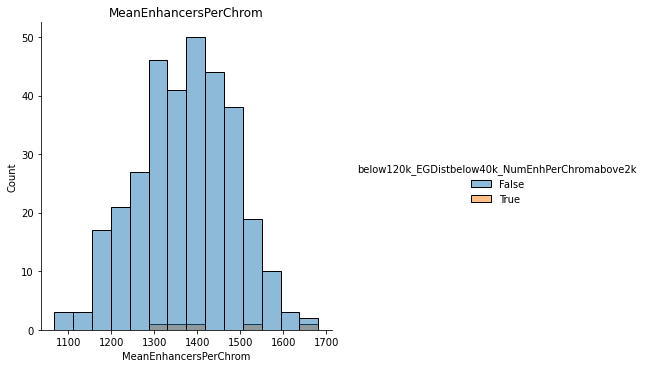

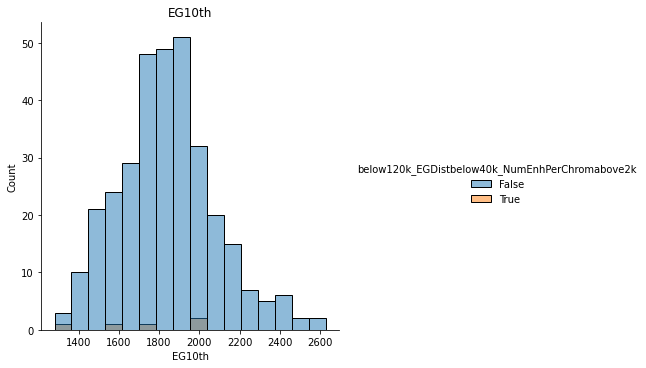

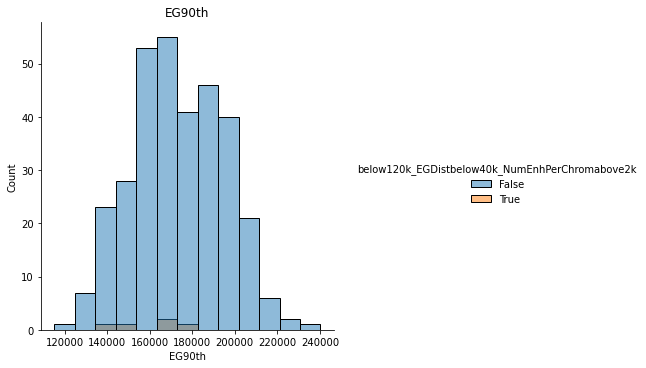

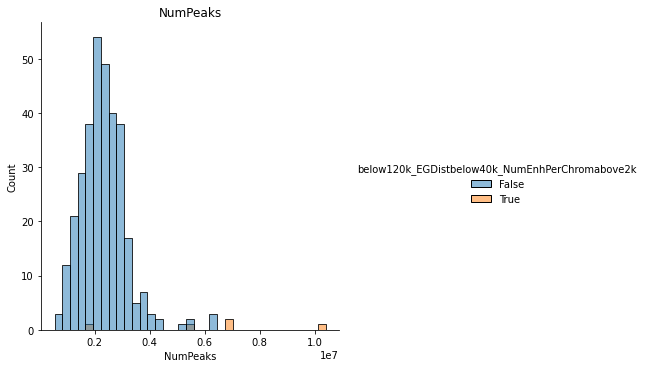

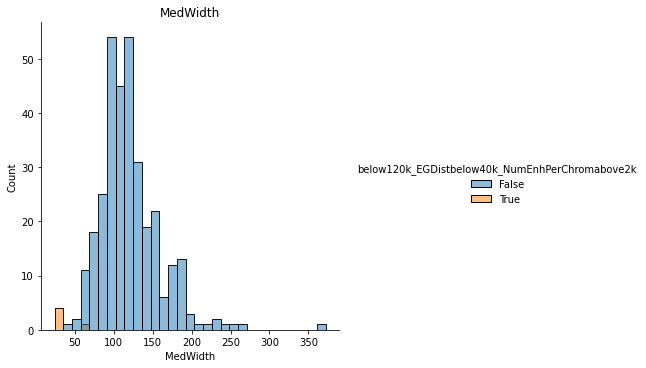

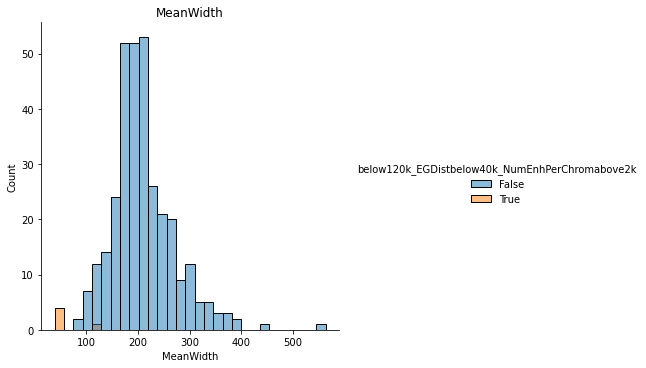

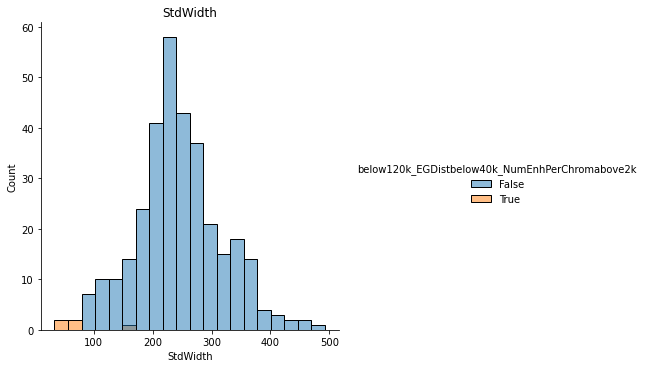

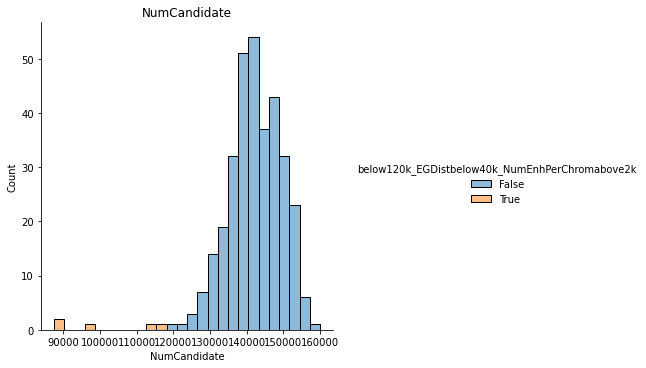

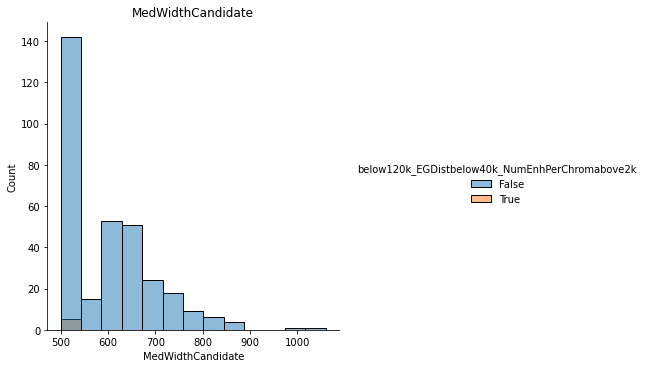

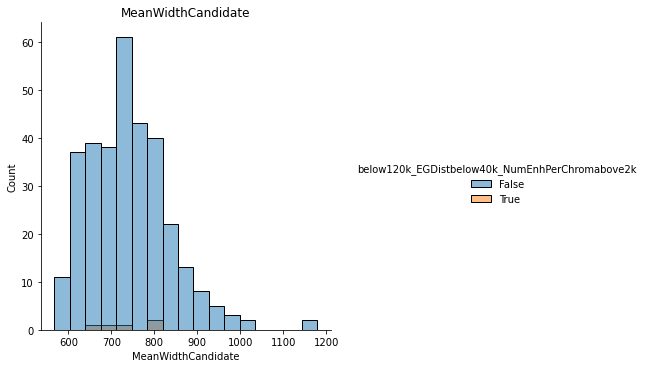

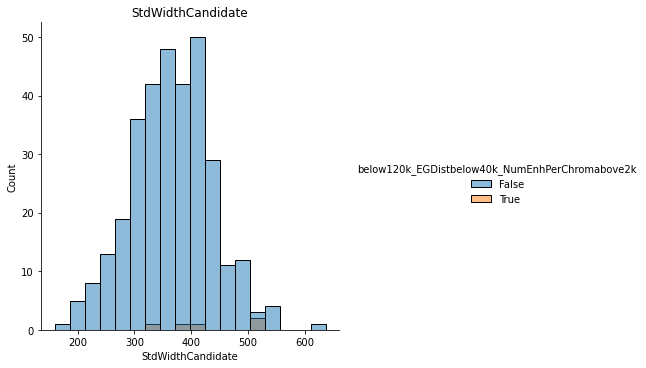

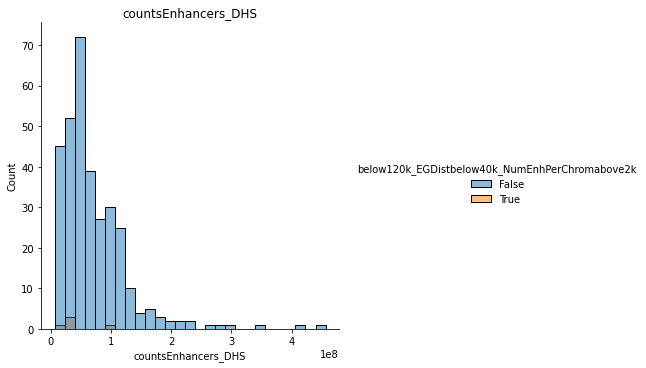

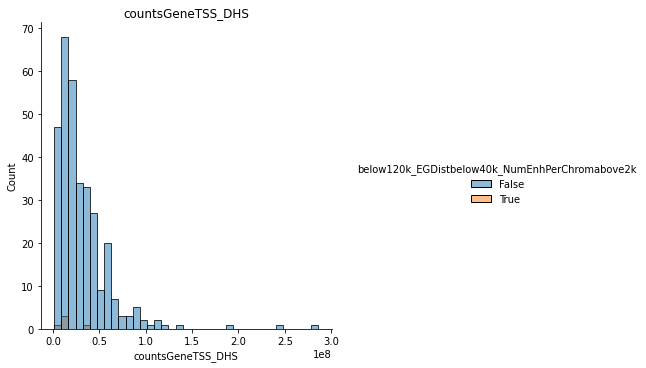

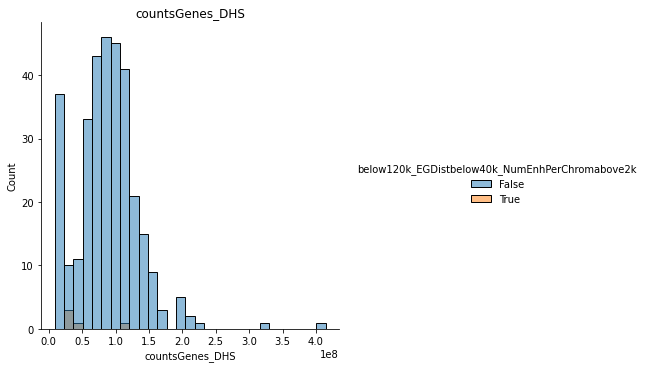

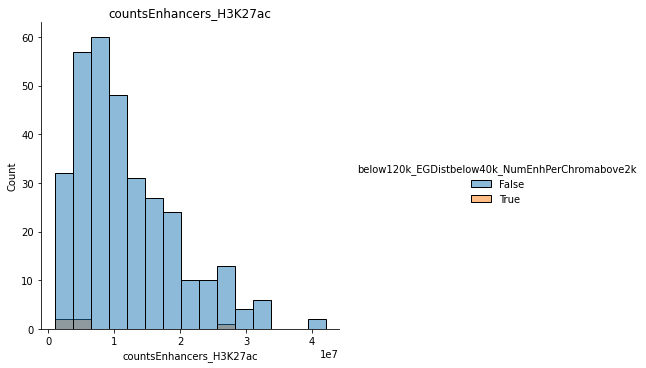

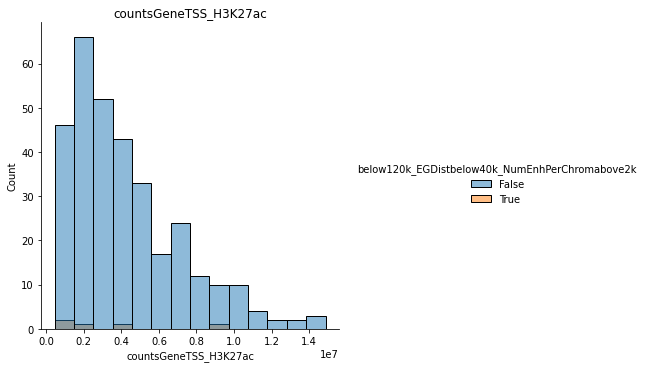

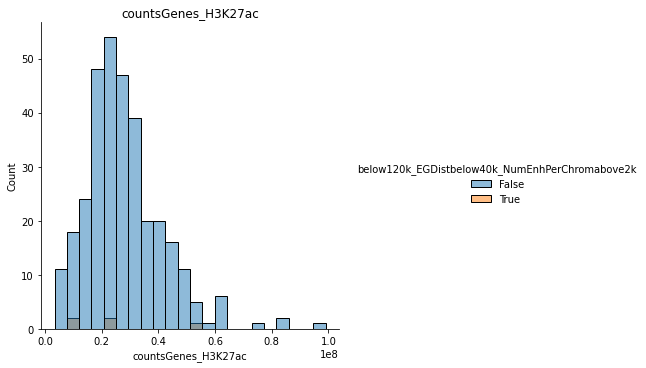

In [22]:
for col in dnase_h3k27ac_metrics.columns[:-2]:
    sns.displot(data=dnase_h3k27ac_metrics, x=col, hue="below120k_EGDistbelow40k_NumEnhPerChromabove2k").set(title=str(col))

## filter metadata for DNase + H3K27ac

In [240]:
metadata = pd.read_csv("/oak/stanford/groups/akundaje/kmualim/out/finalized_metadata/DNase_H3K27ac.default_metadata_full.101222.qc.tsv", sep="\t")

In [241]:
metadata['File accession_DHS'] = ["".join(str(i).split("/scratch/groups/engreitz/Users/kmualim/ABC_data/")) for i in metadata['DHS']]
metadata['File accession_DHS 1'] = ["".join(str(i).split(".bam")) for i in metadata['File accession_DHS']]
metadata['File accession_DHS 2'] = ["".join(str(i).split(".se")) for i in metadata['File accession_DHS 1']]
metadata['File accession_DHS 3'] = [str(i).replace(',', "_") for i in metadata['File accession_DHS 2']]

In [242]:
metadata['File accession_H3K27ac 1'] = ["".join(str(i).split("/scratch/groups/engreitz/Users/kmualim/ABC_data/")) for i in metadata['H3K27ac']]
metadata['File accession_H3K27ac 2'] = ["".join(str(i).split(".bam")) for i in metadata['File accession_H3K27ac 1']]
metadata['File accession_H3K27ac 3'] = ["".join(str(i).split(".se")) for i in metadata['File accession_H3K27ac 2']]
metadata['File accession_H3K27ac 4'] = [str(i).replace(',', "_") for i in metadata['File accession_H3K27ac 3']]

In [243]:
metadata['Biosample term id 2'] = [str(i).split(',')[0].replace(" ", "_").replace(',', "") for i in metadata['Biosample term id']]
#metadata['File accession 2'] = ["_".join(set(str(i).split(','))) for i in metadata['File accession']]
#metadata['File accession_H3K27ac 2'] = ["_".join(set(str(i).split(','))) for i in metadata['File accession_H3K27ac']]
metadata['Biosample 2'] = [str(i)+"_"+str(j)+"_"+str(k) for i,j,k in zip(metadata['Biosample term id 2'], metadata['File accession_DHS 3'], metadata['File accession_H3K27ac 4'])]

In [244]:
# move entries from biosample to biosample 2
metadata['Biosample old'] = metadata['Biosample']
metadata['Biosample'] = metadata['Biosample 2']

In [251]:
metadata.iloc[:, :122]

,Biosample,DHS,H3K27ac,Experiment,File accession,File format,File type,Biosample type,Derived from,Project,...,Controlled by_H3K27ac,File Status_H3K27ac,s3_uri_H3K27ac,Azure URL_H3K27ac,File analysis title_H3K27ac,File analysis status_H3K27ac,Audit WARNING_H3K27ac,Audit NOT_COMPLIANT_H3K27ac,Audit ERROR_H3K27ac,default
0,iPS_DF_19.11_ENCFF966PEX_ENCFF821TYU_ENCFF461LZB,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR383SNM,ENCFF966PEX,bam,bam,cell line,"/files/ENCFF859AWU/, /files/ENCFF065ZSM/, /fil...",Roadmap,...,https://datasetencode.blob.core.windows.net/da...,"ENCODE4 v1.5.1 GRCh38,ENCODE4 v1.5.1 GRCh38","released,released","moderate library complexity, mild to moderate ...","control insufficient read depth,control insuff...","nan,nan",NaN,NaN,NaN,True
1,RWPE2_ENCFF512AOX_ENCFF407ORW_ENCFF246EDR_ENCF...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR306BHE,"ENCFF512AOX,ENCFF407ORW","bam,bam","bam,bam","cell line,cell line","/files/ENCFF762MJQ/, /files/ENCFF827EFI/,/file...","ENCODE,ENCODE",...,https://datasetencode.blob.core.windows.net/da...,"ENCODE4 v1.5.1 GRCh38,ENCODE4 v1.5.1 GRCh38","released,released","mild to moderate bottlenecking,mild to moderat...","severe bottlenecking, poor library complexity,...","nan,nan",NaN,NaN,NaN,True
2,NCI-H929_ENCFF910XNY_ENCFF369NRI_ENCFF670RFC_E...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR090SMP,"ENCFF910XNY,ENCFF369NRI","bam,bam","bam,bam","cell line,cell line","/files/ENCFF762MJQ/, /files/ENCFF339FTF/,/file...","ENCODE,ENCODE",...,https://datasetencode.blob.core.windows.net/da...,"ENCODE4 v1.5.1 GRCh38,ENCODE4 v1.5.1 GRCh38","released,released","moderate library complexity, mild to moderate ...","nan,nan","nan,nan",NaN,NaN,NaN,True
3,A673_ENCFF261YSH_ENCFF860UCH_ENCFF054PXI_ENCFF...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR346JWH,"ENCFF261YSH,ENCFF860UCH","bam,bam","bam,bam","cell line,cell line","/files/ENCFF762MJQ/, /files/ENCFF925QPY/,/file...","ENCODE,ENCODE",...,https://datasetencode.blob.core.windows.net/da...,"ENCODE4 v1.5.1 GRCh38,ENCODE4 v1.5.1 GRCh38","released,released","low read depth, mixed read lengths, mixed run ...","severe bottlenecking, poor library complexity,...","nan,nan",NaN,NaN,NaN,True
4,bipolar_neuron_ENCFF125JWY_ENCFF772EJG_ENCFF35...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR626RVD,"ENCFF125JWY,ENCFF772EJG","bam,bam","bam,bam","in vitro differentiated cells,in vitro differe...","/files/ENCFF440SZY/, /files/ENCFF762MJQ/,/file...","ENCODE,ENCODE",...,https://datasetencode.blob.core.windows.net/da...,"ENCODE4 v1.6.1 GRCh38,ENCODE4 v1.6.1 GRCh38","released,released","nan,nan","nan,nan","nan,nan",NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,naive_thymus-derived_CD4-positive_ENCFF528COZ_...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR387EYA,ENCFF528COZ,bam,bam,primary cell,"/files/ENCFF731JMS/, /files/ENCFF762MJQ/",ENCODE,...,https://datasetencode.blob.core.windows.net/da...,ENCODE4 v1.8.0 GRCh38,released,mixed read lengths,NaN,NaN,NaN,NaN,NaN,False
325,activated_T-cell_ENCFF736DEU_ENCFF697RCH,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR303JDG,ENCFF736DEU,bam,bam,primary cell,"/files/ENCFF100DCB/, /files/ENCFF762MJQ/",ENCODE,...,https://datasetencode.blob.core.windows.net/da...,ENCODE4 v1.8.0 GRCh38,released,"mild to moderate bottlenecking, mixed read len...",NaN,NaN,NaN,NaN,NaN,True
326,stimulated_activated_naive_CD8-positive_ENCFF8...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,/scratch/groups/engreitz/Users/kmualim/ABC_dat...,ENCSR154NYM,ENCFF846LJB,bam,bam,primary cell

In [252]:
metadata.iloc[:, :122].to_csv("/oak/stanford/groups/akundaje/kmualim/out/finalized_metadata/DNase_H3K27ac.default_metadata_full.101322.qc.tsv", sep="\t", index=False)